## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar base de datos
df = pd.read_csv('D:\Base de datos\\Titanic-Dataset.csv')



In [7]:
print(df.describe())
print(df.describe(include='object'))


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
                           Name   Sex  Ticket    Cabin Embarked
count            

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


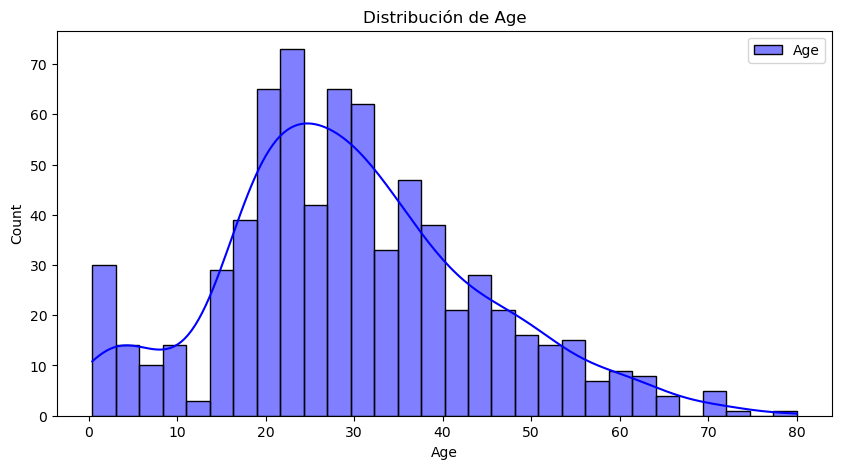

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


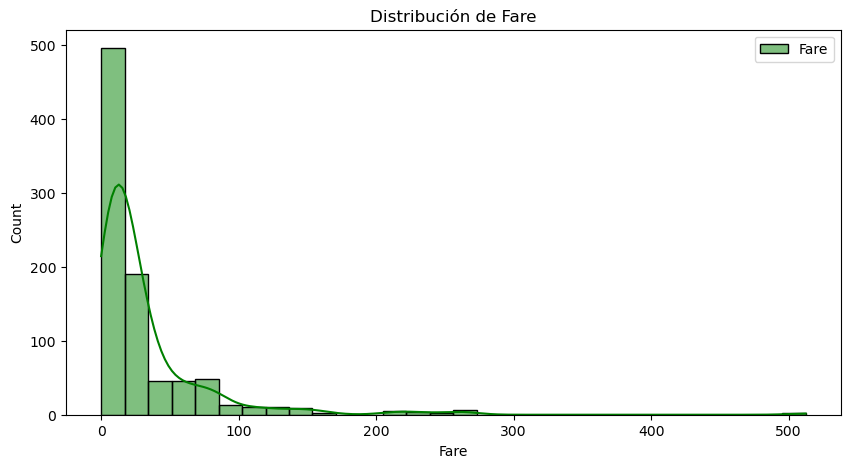

In [8]:
# Histograma de Age y Fare
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'].dropna(), kde=True, bins=30, color='blue', label='Age')
plt.title('Distribución de Age')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Fare'], kde=True, bins=30, color='green', label='Fare')
plt.title('Distribución de Fare')
plt.legend()
plt.show()

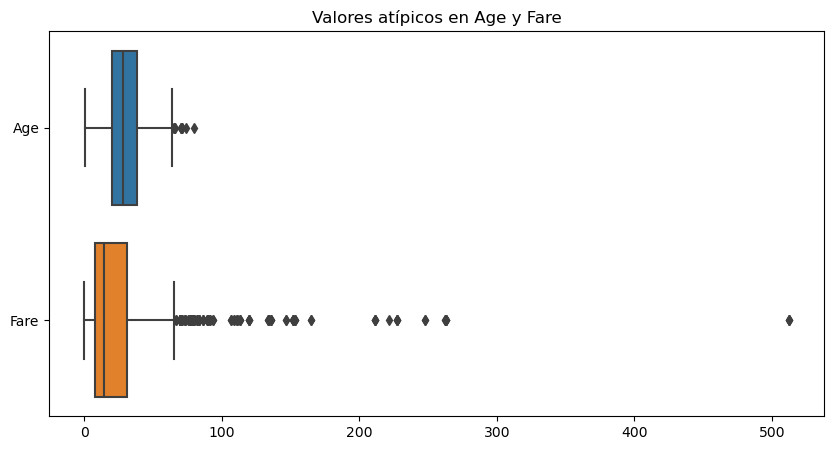

In [9]:
# Diagrama de caja para detectar valores atípicos
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Fare']], orient='h')
plt.title('Valores atípicos en Age y Fare')
plt.show()

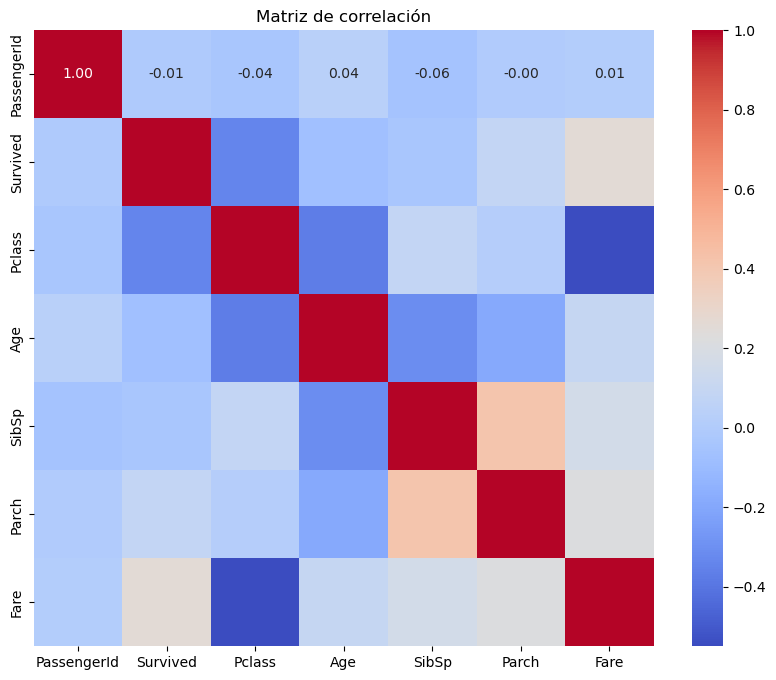

In [14]:
# Filtrar únicamente las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

# Crear la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

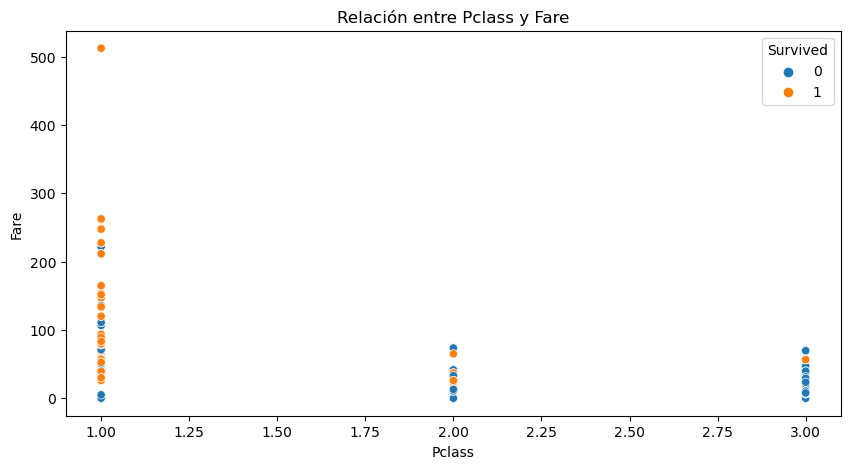

In [11]:
# Relación entre Fare y Pclass
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Pclass', y='Fare', hue='Survived')
plt.title('Relación entre Pclass y Fare')
plt.show()

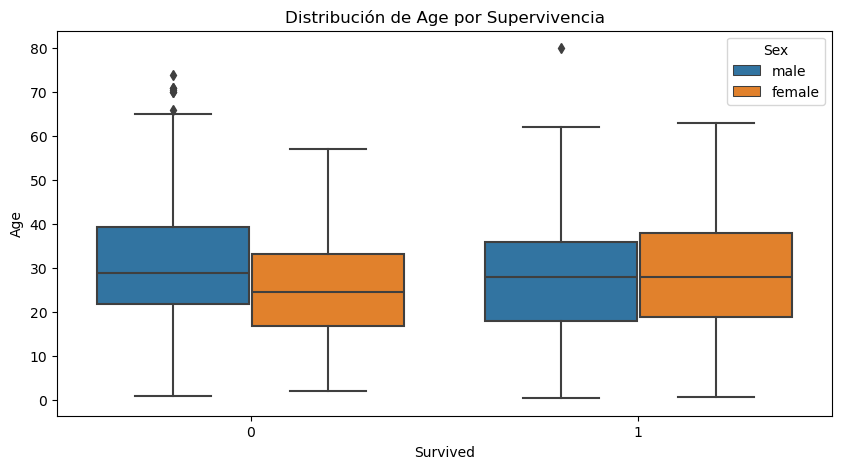

In [12]:
# Relación entre Age y Survived
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Survived', y='Age', hue='Sex')
plt.title('Distribución de Age por Supervivencia')
plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [20]:
# 1. Eliminar columnas irrelevantes
df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# 2. Imputar valores faltantes
from sklearn.impute import SimpleImputer

# Imputar `Age` con la mediana
imputer_age = SimpleImputer(strategy='median')
df['Age'] = imputer_age.fit_transform(df[['Age']])

# 2. Codificación de variables categóricas
# Crear variables dummy para 'Sex' y 'Embarked'
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# 3. Escalar variables numéricas
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [26]:
# 4. Revisar el DataFrame procesado
print("Datos después del preprocesamiento:")
print(df.head())

Datos después del preprocesamiento:
   Survived  Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0         0       3 -0.565736      1      0 -0.502445      True       False   
1         1       1  0.663861      1      0  0.786845     False       False   
2         1       3 -0.258337      0      0 -0.488854     False       False   
3         1       1  0.433312      1      0  0.420730     False       False   
4         0       3  0.433312      0      0 -0.486337      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 

In [61]:
# 1. Separar características y variable objetivo
X = df_cleaned.drop('Survived', axis=1)  # Características
y = df_cleaned['Survived']  # Variable objetivo


In [62]:
# 2. Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# 3. Análisis de importancia de características con Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
# Obtener la importancia de características
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nImportancia de características:")
print(feature_importances)


Importancia de características:
      Feature  Importance
2         Age    0.387521
5        Fare    0.379481
0      Pclass    0.082063
3       SibSp    0.063293
4       Parch    0.049472
7  Embarked_S    0.027886
6  Embarked_Q    0.010284
1         Sex    0.000000


In [65]:
# 4. Selección Recursiva de Características (RFE)
from sklearn.feature_selection import RFE
rfe_model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rfe_model, n_features_to_select=5)  # Seleccionar las 5 mejores características
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)

In [66]:
# Características seleccionadas
selected_features = X.columns[rfe.support_]
print("\nCaracterísticas seleccionadas por RFE:")
print(selected_features)


Características seleccionadas por RFE:
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [67]:
# 1. Definir las características seleccionadas por RFE
selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [68]:
# 2. Separar las características y la variable objetivo
X = df_cleaned[selected_features]
y = df_cleaned['Survived'] 

In [69]:
# 3. Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# 4. Verificar las dimensiones de los conjuntos
print("Dimensiones del conjunto de entrenamiento:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)

print("\nDimensiones del conjunto de prueba:")
print("X_test:", X_test.shape, "y_test:", y_test.shape)

Dimensiones del conjunto de entrenamiento:
X_train: (712, 5) y_train: (712,)

Dimensiones del conjunto de prueba:
X_test: (179, 5) y_test: (179,)


## 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [73]:
# 1. Definir el modelo base
rf_model = RandomForestClassifier(random_state=42)

In [74]:
# 2. Configurar los hiperparámetros para la búsqueda
param_distributions = {
    'n_estimators': [50, 100, 200, 300],       # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30, 40],      # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],          # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],            # Mínimo número de muestras en una hoja
    'bootstrap': [True, False]                # Uso de bootstrap al construir árboles
}

In [75]:
# 3. Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=50,  # Número de combinaciones a probar
    cv=5,       # Validación cruzada de 5 particiones
    random_state=42,
    verbose=1,  # Mostrar progreso
    n_jobs=-1   # Usar todos los núcleos disponibles
)

In [76]:
# 4. Entrenar el modelo usando búsqueda aleatoria
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, verbose=1)

In [77]:
# 5. Mejor combinación de hiperparámetros
print("\nMejores hiperparámetros:")
print(random_search.best_params_)


Mejores hiperparámetros:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 40, 'bootstrap': False}


In [78]:
# 6. Evaluar el modelo en el conjunto de prueba
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

In [79]:
# Calcular precisión y mostrar reporte de clasificación
print("\nPrecisión en el conjunto de prueba:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión en el conjunto de prueba: 0.7597765363128491

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       105
           1       0.77      0.59      0.67        74

    accuracy                           0.76       179
   macro avg       0.76      0.74      0.74       179
weighted avg       0.76      0.76      0.75       179



## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 

In [81]:
# 1. Predicciones del modelo en el conjunto de prueba
y_pred = best_rf_model.predict(X_test)

In [82]:
# 2. Métricas de desempeño
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo (Accuracy): {accuracy:.2f}")

Precisión del modelo (Accuracy): 0.76


In [83]:
# Reporte de clasificación detallado
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))



Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       105
           1       0.77      0.59      0.67        74

    accuracy                           0.76       179
   macro avg       0.76      0.74      0.74       179
weighted avg       0.76      0.76      0.75       179



In [84]:
# 3. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

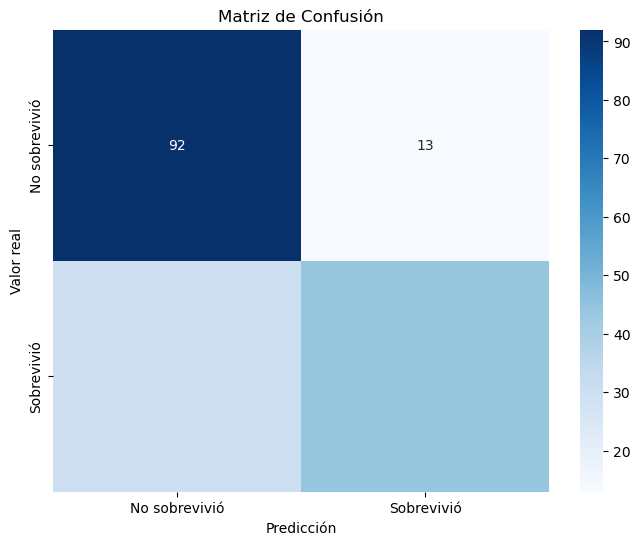

In [85]:
# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()

## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo. 

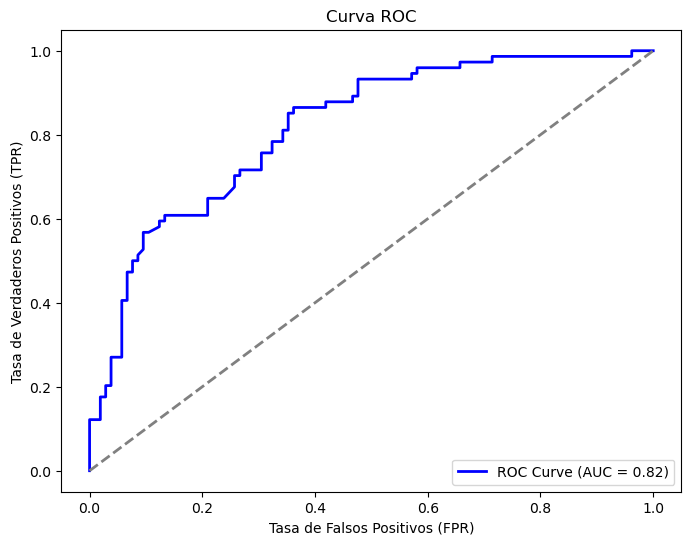

In [87]:
from sklearn.metrics import roc_curve, auc

# Predecir probabilidades para la clase positiva
y_proba = best_rf_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()



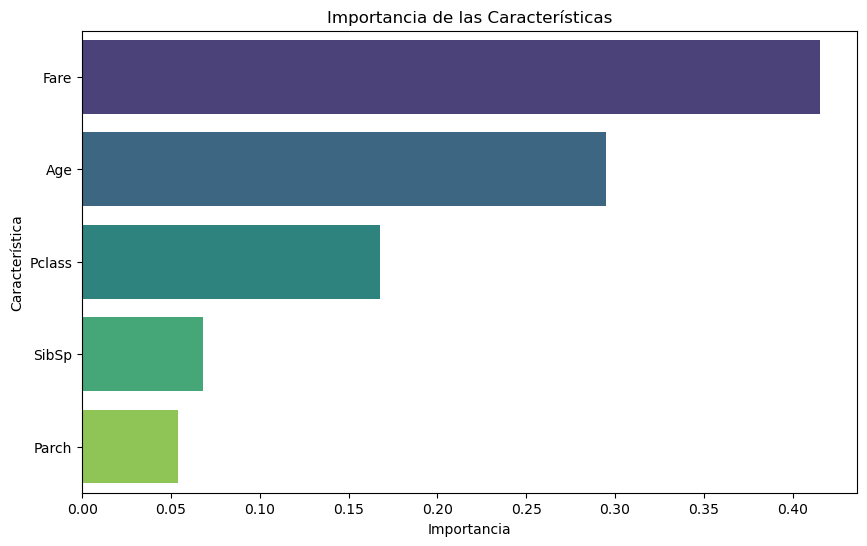

In [88]:
# Importancia de características
import pandas as pd

# Extraer las importancias
importances = best_rf_model.feature_importances_
features = X_train.columns
feature_importances = pd.DataFrame({'Característica': features, 'Importancia': importances}).sort_values(by='Importancia', ascending=False)

# Visualizar las importancias como un barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=feature_importances, palette='viridis')
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


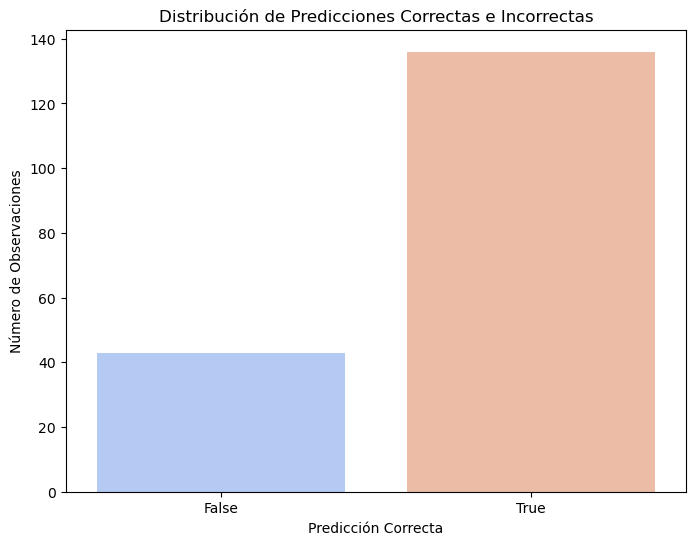

In [89]:
# Crear DataFrame de resultados
results = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
results['Correcto'] = results['Real'] == results['Predicción']

# Visualizar distribución de errores
plt.figure(figsize=(8, 6))
sns.countplot(data=results, x='Correcto', palette='coolwarm')
plt.title('Distribución de Predicciones Correctas e Incorrectas')
plt.xlabel('Predicción Correcta')
plt.ylabel('Número de Observaciones')
plt.show()
